In [2]:
!git clone https://github.com/mnajamudinridha/naja-dataset.git

Cloning into 'naja-dataset'...
remote: Enumerating objects: 10929, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 10929 (delta 2), reused 56 (delta 2), pack-reused 10872 (from 1)
Receiving objects: 100% (10929/10929), 352.18 MiB | 33.77 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (30857/30857), done.


In [3]:
dataset_path = '/content/naja-dataset/dataset-2500'

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os

In [5]:
train_dir = '/content/naja-dataset/dataset-2500/train'
val_dir = '/content/naja-dataset/dataset-2500/val'

In [6]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9185 - loss: 0.1666 - val_accuracy: 0.9230 - val_loss: 0.2882
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.9862 - loss: 0.0423 - val_accuracy: 0.9190 - val_loss: 0.2991
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.9908 - loss: 0.0255 - val_accuracy: 0.9370 - val_loss: 0.2302
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9923 - loss: 0.0199 - val_accuracy: 0.9040 - val_loss: 0.4859
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9370 - val_loss: 0.2604
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.9935 - loss: 0.0166 - val_accuracy: 0.9180 - val_loss: 0.3532
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9928 - loss: 0.0180 - val_accuracy: 0.9380 - val_loss: 0.2941
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9960 - loss: 0.0080 - val_accu

32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step


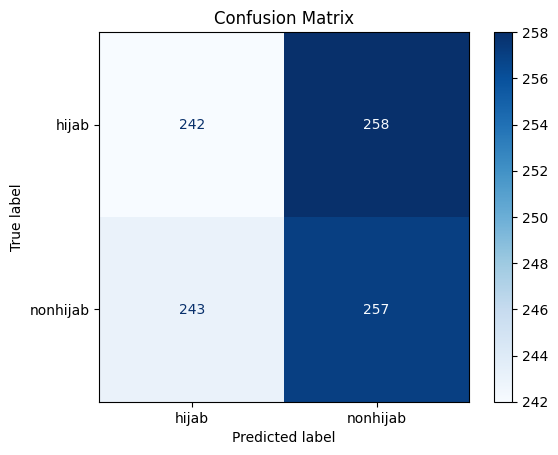

              precision    recall  f1-score   support

       hijab       0.50      0.48      0.49       500
    nonhijab       0.50      0.51      0.51       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



In [9]:
val_generator.reset()
preds = model.predict(val_generator)
y_pred = (preds > 0.5).astype(int).flatten()
y_true = val_generator.classes
labels = list(val_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=labels))

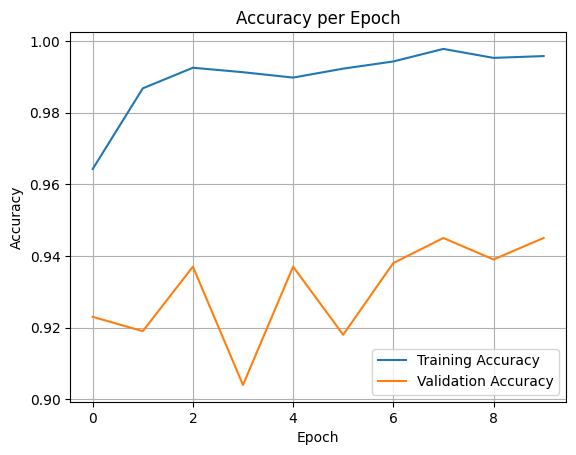

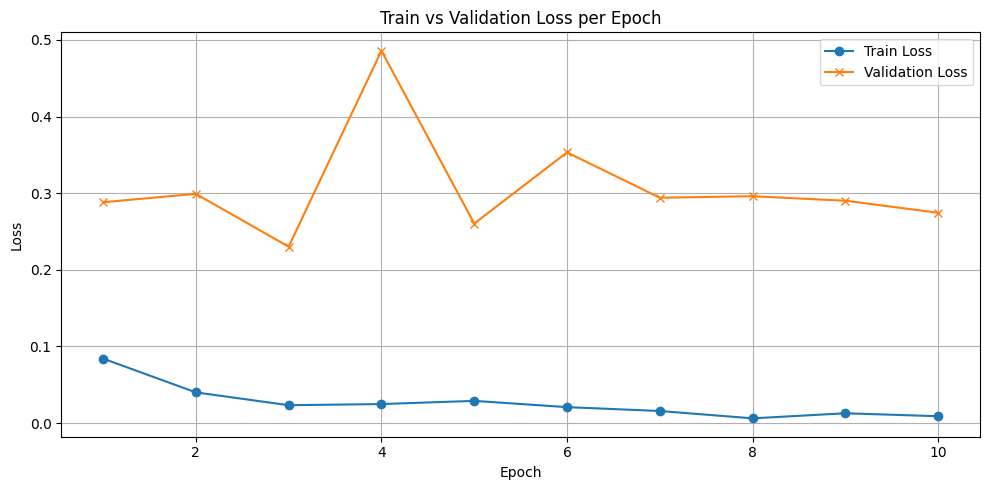

In [10]:
# Ambil loss dari history
train_losses = history.history['loss']
test_losses = history.history['val_loss']
epochs = len(train_losses)
epochs_range = range(1, epochs + 1)

# Visualisasi akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, test_losses, label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from tensorflow.keras.preprocessing import image

def predict_single_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label_map = {v: k for k, v in class_indices.items()}
    pred_class = int(prediction > 0.5)
    print(f"Predicted: {label_map[pred_class]} | Confidence: {prediction:.2f}")

In [12]:
model.save('naja-dataset.keras')

print("Model saved as naja-dataset.keras")

Model saved as naja-dataset.keras


In [13]:
import torch
import torch.nn as nn
from torchvision.models import resnet18

def load_model(checkpoint_path, num_classes, device):
    model = resnet18(weights=None)
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model = model.to(device)
    model.eval()
    return model


In [14]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

def predict_image(image_path, model, device, class_names):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image_tensor)
        _, pred = torch.max(outputs, 1)

    predicted_class = class_names[pred.item()]
    return predicted_class, image


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: NonHijab | Confidence: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted: Hijab | Confidence: 0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted: Hijab | Confidence: 0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted: Hijab | Confidence: 0.00


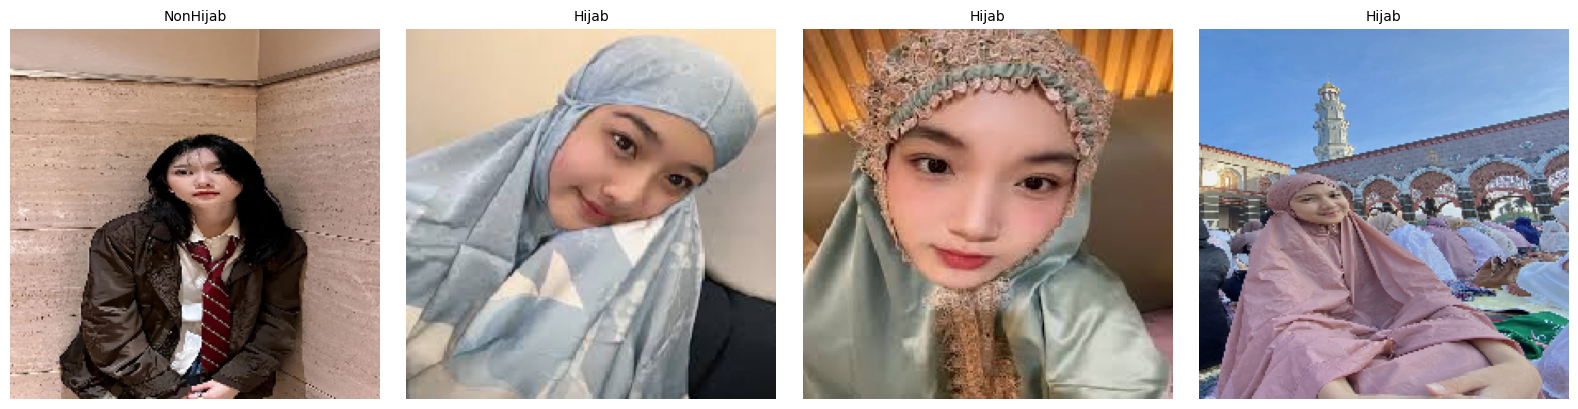

In [ ]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the saved Keras model
model = tf.keras.models.load_model('naja-dataset.keras')

class_names = ['Hijab', 'NonHijab']

img_path = [
    '/content/5.jpg',
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',

]



# Use the predict_single_image function for Keras models
def predict_single_image(img_path, model, class_names):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)[0][0]  # float: 0.0 ~ 1.0
    predicted_class_index = int(prediction > 0.5)
    predicted_label = class_names[predicted_class_index]

    print(f"Predicted: {predicted_label} | Confidence: {prediction:.2f}")
    return predicted_label, img


    plt.imshow(image_to_show)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_label}", fontsize=16)
    plt.tight_layout()
    plt.show()


    print(f"Predicted: {predicted_label} | Confidence: {prediction:.2f}")
    return predicted_label, img

plt.figure(figsize=(16, 4))  # Atur ukuran keseluruhan figure

for i, path in enumerate(img_path):
    predicted_label, image_to_show = predict_single_image(path, model, class_names)

    plt.subplot(1, len(img_path), i + 1)  # Buat grid horizontal
    plt.imshow(image_to_show)
    plt.axis('off')
    plt.title(f"{predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


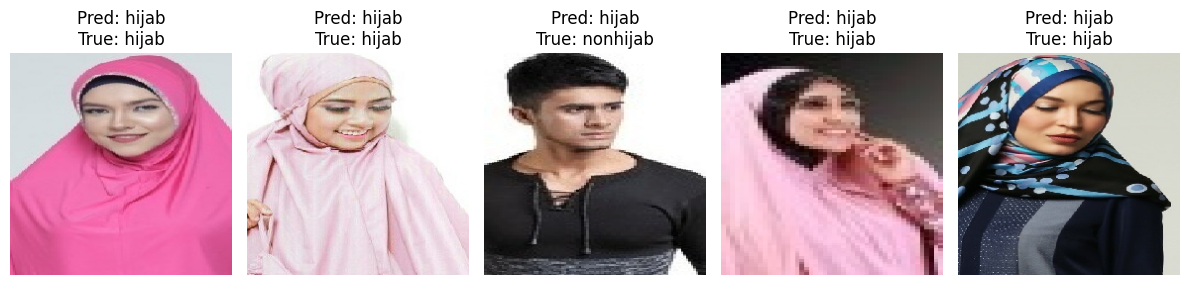

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil beberapa batch dari val_generator
class_names = list(val_generator.class_indices.keys())

val_generator.reset()
images, labels = next(val_generator)

# Ambil 5 sampel gambar pertama
plt.figure(figsize=(12, 6))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    pred = model.predict(np.expand_dims(images[i], axis=0))
    pred_label = class_names[np.argmax(pred)]
    true_label = class_names[int(labels[i])]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()
